## The plan
- Simple handling of variables
- different useful variable types from lists to dictionaries to dataframes
- slicing dataframes, looking at your data
- loading up a clinical text dataset
- filtering for text content
- Regular expressions
- saving your datasets and graphs

let's take abreak every hour

In [ ]:
# May not be needed

%pip install pandas
%pip install seaborn

In [9]:
from IPython.display import HTML, display

def set_css():
  display(HTML(''' <style> pre { white-space: pre-wrap; } </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [3]:
import pandas as pd
import seaborn as sns
import datetime
import re

In [31]:
# variable - a number
a =  71 
print(a)


71


In [32]:
# you can do maths with numbers
print (1+1)
print (a*5)
print ((a*5)/100)

2
355
3.55


In [37]:
# formatted printing
b= (a*5)/100
print(f'So a is {a:.1f}')
print('So a is {:.1f}'.format(b))

So a is 71.0
So a is 3.5


In [39]:
# variable - a string
the_string = 'this is an example of a string'
print(f'So the contents of the_string is {the_string} \n and you can insert \\ newlines in prinouts and strings with \\n')

So the contents of the_string is this is an example of a string 
 and you can insert \ newlines in prinouts and strings with \n


In [40]:
the_string+'  . . . if you do maths - even on strings the result of last thing you do will output to the screen in this case, it is a string (hence the \'\')'

"this is an example of a string  . . . if you do maths - even on strings the result of last thing you do will output to the screen in this case, it is a string (hence the '')"

In [42]:
# variable - a list
a=['the', 'quick', 'brown', 'fox', the_string]
print(f'So a is {a}')

So a is ['the', 'quick', 'brown', 'fox', 'this is an example of a string']


In [54]:
# iterate over a list

for item in a:
    print(f'item = {item}')

item = the
item = quick
item = brown
item = fox
item = this is an example of a string


In [63]:
# a.append('elephant')
a.remove('elephant')
a

ValueError: ignored

### Activity:
Google how to add and remove items from a list

In [64]:
# dictionary
a = {'name':'John', 'postcode':'ch64', 'dob':datetime.date(2012,6,1)}
print(f'So a is {a}')

So a is {'name': 'John', 'postcode': 'ch64', 'dob': datetime.date(2012, 6, 1)}


### Activity:
Google how to add key/value pairs to a dictionary

In [65]:
a['species']='elephant'
print(a)

{'name': 'John', 'postcode': 'ch64', 'dob': datetime.date(2012, 6, 1), 'species': 'elephant'}


In [66]:
print(f'The name is {a["name"]}')

The name is John


In [67]:
# list of dictionaries
people_list = [{'name':'John', 'postcode':'ch64', 'dob':datetime.date(2012,6,1)},
    {'name':'Roger', 'postcode':'CH21', 'dob':datetime.date(2010,6,8)},
    {'name':'Sheila', 'postcode':'CH45', 'dob':datetime.date(2012,3,1)}
    ]
    
for person in people_list:
    print(f'{person["name"]} living at postcode {person["postcode"]} was born on the {person["dob"]}')

John living at postcode ch64 was born on the 2012-06-01
Roger living at postcode CH21 was born on the 2010-06-08
Sheila living at postcode CH45 was born on the 2012-03-01


### Activity:
What is a set . . . . 

In [76]:
a=['elephant','elephant','banana']
set(a)

{'banana', 'elephant'}

In [74]:
our_set=set(['dog'])
our_set.add('elephant')
our_set.add('elephant')
our_set

{'dog', 'elephant'}

In [78]:
# datetimes
the_date = datetime.date(2016,6,1)
print(the_date)
print(f'the-date is {the_date}')

the_month = the_date.month
the_day = the_date.day
the_year = the_date.year

nice_date_string = the_date.strftime('%d/%m/%y')

print(f'the-date is {the_date} so the month is {the_month}, the day is {the_day}, the year is {the_year} which formatted nicely is {nice_date_string}')

2016-06-01
the-date is 2016-06-01
the-date is 2016-06-01 so the month is 6, the day is 1, the year is 2016 which formatted nicely is 01/06/16


### Activity:
Create a date object for your birthday and print it out (formatted the way you want it) as part of a string 
Print which day of the year this date is ( might need Google for that - involves %j )

In [ ]:
(a*5)/100

In [79]:

print(f"The day of the year for the_date is:{the_date.strftime('%j')}")

The day of the year for the_date is:153


## Dataframes - a spreadsheet in code

In [80]:
# dataframe

data = {'name':['John', 'Roger', 'Sheila'],
        'postcode':['CH64','CH21','CH45'],
        'dob':[datetime.date(2012,6,1),
                datetime.date(2010,6,8),
                datetime.date(2012,3,1)]}
df = pd.DataFrame(data)

In [83]:
df.head(2)

,name,postcode,dob
0,John,CH64,2012-06-01
1,Roger,CH21,2010-06-08


In [84]:
df.loc[df.name=='John']

,name,postcode,dob
0,John,CH64,2012-06-01


In [85]:
df.loc[df.name.isin(['John','Sheila'])]

,name,postcode,dob
0,John,CH64,2012-06-01
2,Sheila,CH45,2012-03-01


## Let's load up some SAVSNET data

In [4]:
# https://stackoverflow.com/questions/59393194/how-to-download-xlsx-file-from-url-and-save-in-data-frame-via-python

SAVSNET_DATA_URL="https://www.liverpool.ac.uk/media/livacuk/savsnet/SAVSNET,sample,vet,data.xlsx"
savsnet_df=pd.read_excel(SAVSNET_DATA_URL)

In [94]:
savsnet_df.head(5)

,Unnamed: 0,SAVSNET_consult_id,Narrative,SAVSNET MPC,Consult_date,Species
0,0,1111025,"""Booster: hc satis. O no concerns. Ce NAD. Una...",vaccination,2016-01-27 08:40:27,dog
1,1,6761083,some tartar care w/ weight! reduce calories by...,vaccination,2019-10-03 11:24:06,dog
2,2,3938657,"""Came in for 6 month HPC check. BAR Hr=100 mm=...",other_healthy,2017-11-29 17:47:49,unknown
3,3,6081319,lame RF 5 days possibly getting better - had l...,trauma,2019-05-09 09:24:07,dog
4,4,4162251,"""H: Ate some plastic approx a week ago. This h...",other_unwell,2018-01-30 16:55:57,dog


In [95]:
# Get rid of unwanted column
savsnet_df = savsnet_df.drop('Unnamed: 0', axis=1)
# same as savsnet_df.drop('Unnamed: 0', axis=1, inplace=True)
print(savsnet_df.head(5))

   SAVSNET_consult_id                                          Narrative  \
0             1111025  "Booster: hc satis. O no concerns. Ce NAD. Una...   
1             6761083  some tartar care w/ weight! reduce calories by...   
2             3938657  "Came in for 6 month HPC check. BAR Hr=100 mm=...   
3             6081319  lame RF 5 days possibly getting better - had l...   
4             4162251  "H: Ate some plastic approx a week ago. This h...   

     SAVSNET MPC        Consult_date  Species  
0    vaccination 2016-01-27 08:40:27      dog  
1    vaccination 2019-10-03 11:24:06      dog  
2  other_healthy 2017-11-29 17:47:49  unknown  
3         trauma 2019-05-09 09:24:07      dog  
4   other_unwell 2018-01-30 16:55:57      dog  


In [96]:
savsnet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SAVSNET_consult_id  4415 non-null   int64         
 1   Narrative           4415 non-null   object        
 2   SAVSNET MPC         4400 non-null   object        
 3   Consult_date        4415 non-null   datetime64[ns]
 4   Species             4415 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 172.6+ KB


In [99]:
savsnet_df.at[4402,'Species']

'dog'

In [102]:
savsnet_df.loc[savsnet_df['SAVSNET MPC']=='gastroenteric'].head(3)

,SAVSNET_consult_id,Narrative,SAVSNET MPC,Consult_date,Species
16,2298369,"""Has vomitted the last 3 meals around half hr ...",gastroenteric,2016-10-13 13:59:32,cat
17,3266558,"""BM Ate two icelolly sticks. Less than an hour...",gastroenteric,2017-06-19 17:56:50,dog
69,1506060,"""vomitting again a few times , another cat has...",gastroenteric,2016-04-22 09:57:03,cat


In [105]:
savsnet_df.loc[savsnet_df['SAVSNET MPC']=='kidney_disease'].shape[0]

23

# Let's plot some data

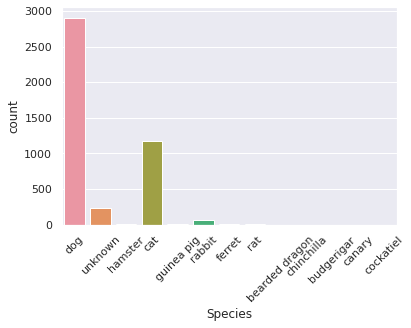

In [107]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html

sns.set_theme(style="darkgrid")
graph_axes = sns.countplot(x="Species", data=savsnet_df)

graph_axes.tick_params(axis='x', labelrotation = 45)


In [108]:
figure = graph_axes.get_figure()
figure.savefig("my_graph.png")

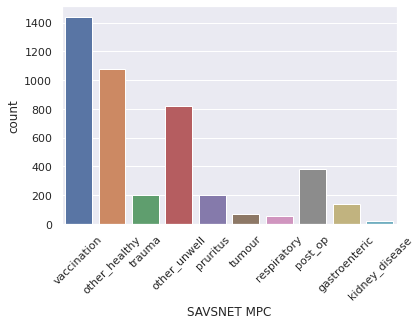

In [109]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html

sns.set_theme(style="darkgrid")
graph_axes = sns.countplot(x="SAVSNET MPC", data=savsnet_df)
graph_axes.tick_params(axis='x', labelrotation = 45)

In [131]:
# add a calculated column to your dataframe
savsnet_df['month'] = savsnet_df.Consult_date.dt.month
savsnet_df['new_col']=1
savsnet_df.loc[savsnet_df.Species=='hamster','new_col']= 3

In [132]:
savsnet_df.head(20)

,Unnamed: 0,SAVSNET_consult_id,Narrative,SAVSNET MPC,Consult_date,Species,month,new_col,newcol
0,0,1111025,"""Booster: hc satis. O no concerns. Ce NAD. Una...",vaccination,2016-01-27 08:40:27,dog,1,1,NaN
1,1,6761083,some tartar care w/ weight! reduce calories by...,vaccination,2019-10-03 11:24:06,dog,10,1,NaN
2,2,3938657,"""Came in for 6 month HPC check. BAR Hr=100 mm=...",other_healthy,2017-11-29 17:47:49,unknown,11,1,NaN
3,3,6081319,lame RF 5 days possibly getting better - had l...,trauma,2019-05-09 09:24:07,dog,5,1,NaN
4,4,4162251,"""H: Ate some plastic approx a week ago. This h...",other_unwell,2018-01-30 16:55:57,dog,1,1,NaN
5,5,1646703,"""seems better now.""",pruritus,2016-05-24 17:04:26,hamster,5,3,3.0
6,6,4484795,"""urine sample obtained (had to be syringed off...",other_healthy,2018-05-09 16:34:46,dog,5,1,NaN
7,7,3333001,"""6th laser tx back/hips. struggling with the h...",other_healthy,2017-07-06 10:07:31,dog,7,1,NaN
8,8,6825629,dhp+l4+kc. bar dude nad.,other_healthy,2019-10-17 18:15:53,dog,10,1,NaN
9,9,6513087,"2nd L4, recheck heart, arrange dental. no murm...",tumour,2019-08-09 09:15:30,dog,8,1,NaN


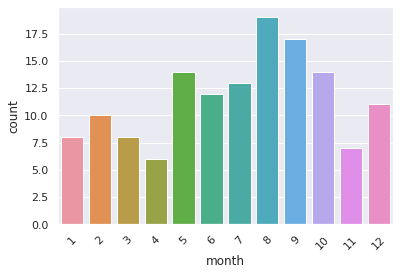

In [117]:
sns.set_theme(style="darkgrid")

# graph_axes = sns.countplot(x="month", data=savsnet_df)
# graph_axes = sns.countplot(x="month", data=savsnet_df.loc[savsnet_df.Species=='cat'])
graph_axes = sns.countplot(x="month", data=savsnet_df.loc[savsnet_df['SAVSNET MPC']=='gastroenteric'])
graph_axes.tick_params(axis='x', labelrotation = 45)

In [115]:
savsnet_df.Consult_date.max()

Timestamp('2019-10-22 19:19:56')

In [118]:
# grouping
monthly_counts_df = savsnet_df.groupby('month').count()

In [119]:
monthly_counts_df.head(5)

,SAVSNET_consult_id,Narrative,SAVSNET MPC,Consult_date,Species
month,,,,,
1,342,342,341,342,342
2,318,318,318,318,318
3,336,336,332,336,336
4,313,313,310,313,313
5,362,362,358,362,362


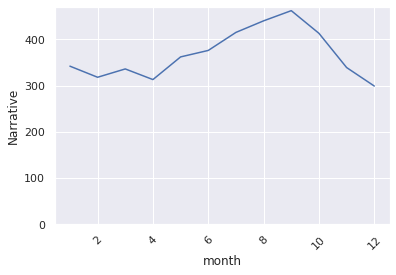

In [121]:
sns.set_theme(style="darkgrid")
graph_axes = sns.lineplot(x="month", data=monthly_counts_df, y='Narrative')
graph_axes.set(ylim=(0,None))
graph_axes.tick_params(axis='x', labelrotation = 45)

# Text Mining

In [133]:
# Consults that contain text
test_string = "The Quick Brown Fox Jumped Over The Lazy Dog"

In [138]:
test_string.lower()
test_string.upper()
test_string.replace('Fox','[Wild Animal]')

'The Quick Brown [Wild Animal] Jumped Over The Lazy Dog'

In [139]:
if 'Fox' in test_string:
    print('I saw a fox')
else:
    print('No fox here')

I saw a fox


In [142]:
# Make a function

def foxes_in(test_string):
    if 'fox' in test_string.lower():
        return True
    else:
        return False
        

In [143]:
print(foxes_in("I saw a fox"))

True


In [ ]:
# If you make functions - it is good to do them in a readable, well documented way
def foxes_in(test_string:str)->bool:
    """ Tests to see if the word fox is in a submitted string
    params: test_string: this is a string in which a fox migth be hidden - it gets converted to lower case
    returns: boolean true or False for the outcome.
    """
    if 'fox' in test_string.lower:
        return True
    else:
        return False

### Test
Write a function that has 2 arguments, the thing you are searching for and the string to search in - the function should return True or False

In [144]:
def find_string_in(string_to_find:str, test_string:str)->bool:
    """ Tests to see if the string_to_find is in a submitted string
    params: test_string: this is a string in which a fox migth be hidden - it gets converted to lower case
    params: string_to_find: this is the string you are looking for
    returns: boolean true or False for the outcome
    """
    if string_to_find.lower() in test_string.lower():
        return True
    else:
        return False

## Regular Expressions

In [162]:
# regular expressions
test_string = "The Quick Brown Fox Jumped Over The Lazy Dog at theatre with his brother "

my_regex_string = r'\bthe\b'
my_regex =  re.compile(my_regex_string,re.IGNORECASE)

matches = my_regex.findall(test_string)
print(f'there were {len(matches)} matches for the regex and these were {matches}')

there were 2 matches for the regex and these were ['The', 'The']


In [148]:
matches = my_regex.findall(test_string)
print(f'there were {len(matches)} matches for the regex and these were {matches}')

there were 4 matches for the regex and these were ['The', 'The', 'the', 'the']


In [154]:
my_regex.match(test_string)

<re.Match object; span=(0, 4), match='The '>

# Putting that together with your dataframe

In [167]:
# using your function
target_string = 'concern'
savsnet_df['matches']=savsnet_df.Narrative.apply(lambda x: find_string_in(string_to_find=target_string, test_string=x))
savsnet_df.head(5)

,Unnamed: 0,SAVSNET_consult_id,Narrative,SAVSNET MPC,Consult_date,Species,month,new_col,newcol,matches
0,0,1111025,"""Booster: hc satis. O no concerns. Ce NAD. Una...",vaccination,2016-01-27 08:40:27,dog,1,1,NaN,True
1,1,6761083,some tartar care w/ weight! reduce calories by...,vaccination,2019-10-03 11:24:06,dog,10,1,NaN,False
2,2,3938657,"""Came in for 6 month HPC check. BAR Hr=100 mm=...",other_healthy,2017-11-29 17:47:49,unknown,11,1,NaN,False
3,3,6081319,lame RF 5 days possibly getting better - had l...,trauma,2019-05-09 09:24:07,dog,5,1,NaN,False
4,4,4162251,"""H: Ate some plastic approx a week ago. This h...",other_unwell,2018-01-30 16:55:57,dog,1,1,NaN,False


In [168]:
savsnet_df.loc[savsnet_df.matches==True].shape

(713, 10)

In [173]:
# using regexes
my_regex_string = r'(?<!no\W)concern\b'
my_regex =  re.compile(my_regex_string,re.IGNORECASE)

savsnet_df['matches']=savsnet_df.Narrative.str.contains(my_regex, regex=True)
savsnet_df.loc[savsnet_df.matches].head(5)

,Unnamed: 0,SAVSNET_consult_id,Narrative,SAVSNET MPC,Consult_date,Species,month,new_col,newcol,matches
527,527,612436,"""Recheck ears and feet. feet <<identifier>> mu...",pruritus,2015-09-16 10:29:03,dog,9,1,NaN,True
567,567,678914,"""vacc- o concern scratching ears. pe. wt ideal...",vaccination,2015-10-07 10:09:12,unknown,10,1,NaN,True
673,673,2994510,"""Next appointment in 4 days. re-check. Clincal...",gastroenteric,2017-04-06 17:11:38,dog,4,1,NaN,True
731,731,4569646,"""Bosoter l4/kc. OR BAR, DUDE, no V+/D+/coughin...",vaccination,2018-06-04 12:41:35,dog,6,1,NaN,True
747,747,5158326,Stranguria/Haematuria. Hx: past 2 weeks has be...,other_unwell,2018-10-05 17:04:55,dog,10,1,NaN,True


In [174]:
# how many narratives have 'the' in them

savsnet_df.loc[savsnet_df.matches].shape

(42, 10)

In [175]:
# Let's look at a sample

sample_df = savsnet_df.loc[savsnet_df.matches].sample(5)
for row in sample_df.itertuples():
    print(row.Narrative, '\n')

"Hx- sore eye. noticed when got home eye swollen and sore. eats well at home, does look for drinks a lot. Ex- stressed. thin cat, lost 600g since last yr, 2/9 body condition score. HR 200, no missed beats. flat cat here today. when does sit or on floor has plantergrade stance and sunken fores. abdo palp ok, kidneys very distal in abdo, seem on large size for cat of her size but appear symmetrical. small goitre L side but hard to palp well as would not lift her head. L eye- swollen above causing eye to close about 1/3 skin mild erythemic, eye ok, no stain uptake no wound found. Tx- half dose injection meta. Plan- r/v tomorrow to re-ex- may be injury, or may be starting of abscess and need to r/o. also recomm <<identifier>> bloods as concern over marked wt loss and body condition score.  discussed differential diagnosis of DM vs renal vs hyperT" 

"No further discharge from tract Lateral L stifle Still 7/10ths lame although is using leg better than before. Concern that may be some suture

In [176]:
savsnet_df['match_count']=savsnet_df.Narrative.apply(lambda x: len(my_regex.findall(x)))

In [177]:
savsnet_df

,Unnamed: 0,SAVSNET_consult_id,Narrative,SAVSNET MPC,Consult_date,Species,month,new_col,newcol,matches,match_count
0,0,1111025,"""Booster: hc satis. O no concerns. Ce NAD. Una...",vaccination,2016-01-27 08:40:27,dog,1,1,NaN,False,0
1,1,6761083,some tartar care w/ weight! reduce calories by...,vaccination,2019-10-03 11:24:06,dog,10,1,NaN,False,0
2,2,3938657,"""Came in for 6 month HPC check. BAR Hr=100 mm=...",other_healthy,2017-11-29 17:47:49,unknown,11,1,NaN,False,0
3,3,6081319,lame RF 5 days possibly getting better - had l...,trauma,2019-05-09 09:24:07,dog,5,1,NaN,False,0
4,4,4162251,"""H: Ate some plastic approx a week ago. This h...",other_unwell,2018-01-30 16:55:57,dog,1,1,NaN,False,0
...,...,...,...,...,...,...,...,...,...,...,...
4410,4410,4713926,"""Microchip implant. Checked no chip prior to i...",other_healthy,2018-07-09 10:41:14,cat,7,1,NaN,False,0
4411,4411,3370385,"""OR no concerns EDDU. V+ a little after last v...",vaccination,2017-07-14 17:45:20,dog,7,1,NaN,False,0
4412,4412,650951,"""patient is in good form after dental, owner r...",post_op,2015-09-28 18:03:04,dog,9,1,NaN,False,0
4413,4413,3328882,"""<<name>> 2 cysts on head advise removal. also...",other_healthy,2017-07-05 11:40:31,cat,7,1,NaN,False,0


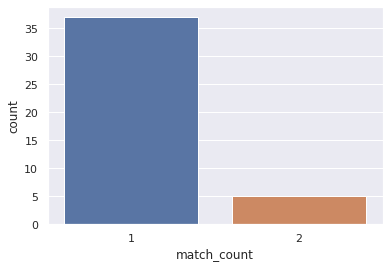

In [179]:
# grouping
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="match_count", data=savsnet_df.loc[savsnet_df.match_count>0])

### Activity
<p>Design a regex to find something you are interested in test it in your workbook and refine it until is shows you what you want and then plot some counts by species.</p>

Let's use a helpful test-editor to work on regexes: <a href="http://regex101.com">Regex101</a>

In [47]:
def tag_it(matchobj):
    return(f'<mark>{matchobj.group(0)}</mark>')
  
def regex_scan_and_display_matches(regex_string:str, df:pd.DataFrame, narrative_column:str, display_sample:int=5):
  """
  takes a regex - scans rows in the dataframe provided for matches - annotates the df True/False and prints out a bunch of rows in HTML to the Jupyter outputs
  params: regex_string: THis is the regex to use for scanning
  params: df: This is the dataframe with a column with text to scan
  params: narrative_colum: this is the column that contains the narrative text
  params: display_sample: this is the number of example records to display
  returns: None
  """
  my_regex =  re.compile(regex_string,re.IGNORECASE)

  df['matches']=df[narrative_column].str.contains(my_regex, regex=True)
  sample_df = df.loc[df.matches].sample(display_sample)
  narrative_index = list(df.columns).index(narrative_column)+1
  
  display_text=""
  for row in sample_df.itertuples():
    new_text = row[narrative_index]
    new_text = my_regex.sub(repl=tag_it, string=new_text)
    display_text += f'<p>{new_text}</p>'
  display(HTML(display_text))

In [48]:
# Copy and paste your regex into the my_regex_string definition
# print out a load of matched records to see how well your regex works here
my_regex_string = r'diarrhoea'
regex_scan_and_display_matches(my_regex_string, savsnet_df, 'Narrative', 5)


In [16]:
my_regex.sub('b', 'banana')

'bbnbnb'

In [181]:
datestamp=datetime.datetime.now().strftime('%d%m%Y')
savsnet_df.to_pickle(f'savsnet_data_{datestamp}.pkl.gz')
savsnet_df.to_csv(f'savsnet_data_{datestamp}.csv')
savsnet_df.to_excel(f'savsnet_data_{datestamp}.xlsx')

In [190]:
savsnet_df.Consult_date.max()

Timestamp('2019-10-22 19:19:56')

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
